# Ch02.12. 실전-한국 부동산 데이터 시각화 경진대회

---

* 날짜: 2022-05-03
* 이름: 박태현


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import glob, os # 파일 경로에 관한 라이브러리


In [2]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
sns.set(font_scale = 1.2, style = 'white', palette = 'tab20')
plt.rcParams['font.family'] = 'NanumGothic' # 폰트 설정

In [7]:
cd /content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DataAnalysis-main/02.데이터시각화/235724_한국 부동산 데이터 시각화 경진대회_data

/content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DataAnalysis-main/02.데이터시각화/235724_한국 부동산 데이터 시각화 경진대회_data


In [8]:
!ls

'아파트 실거래가격지수.csv'	   미분양주택현황.csv
 지역별_지가변동률.csv		   주택건설인허가실적.csv
 유형별_주택월세통합가격지수.csv  '주택매매가격지수(KB).csv'
 건축허가현황.csv		  '주택전세가격지수(KB).csv'
 국내건설수주액.csv


In [14]:
df_path = '/content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DataAnalysis-main/02.데이터시각화/235724_한국 부동산 데이터 시각화 경진대회_data'
df_path

'/content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DataAnalysis-main/02.데이터시각화/235724_한국 부동산 데이터 시각화 경진대회_data'

In [241]:
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

## 개인 주제 : 경북 부동산 추세

### 전처리

In [270]:
fields = sorted(os.listdir(df_path))
fields = [
 '미분양주택현황.csv',
 '아파트 실거래가격지수.csv',
 '유형별_주택월세통합가격지수.csv',
 '주택건설인허가실적.csv',
 ]
fields

['미분양주택현황.csv',
 '아파트 실거래가격지수.csv',
 '유형별_주택월세통합가격지수.csv',
 '주택건설인허가실적.csv']

In [41]:
dfs = []
for field in fields :
    f = f'{df_path}/{field}'
    print(field, f)
    df = pd.read_csv(f)
    dfs.append(df)

dfs

미분양주택현황.csv /content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DataAnalysis-main/02.데이터시각화/235724_한국 부동산 데이터 시각화 경진대회_data/미분양주택현황.csv
아파트 실거래가격지수.csv /content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DataAnalysis-main/02.데이터시각화/235724_한국 부동산 데이터 시각화 경진대회_data/아파트 실거래가격지수.csv
유형별_주택월세통합가격지수.csv /content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DataAnalysis-main/02.데이터시각화/235724_한국 부동산 데이터 시각화 경진대회_data/유형별_주택월세통합가격지수.csv
주택건설인허가실적.csv /content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DataAnalysis-main/02.데이터시각화/235724_한국 부동산 데이터 시각화 경진대회_data/주택건설인허가실적.csv
주택매매가격지수(KB).csv /content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DataAnalysis-main/02.데이터시각화/235724_한국 부ᄃ

[     Unnamed: 0    전국[호]  서울[호]   부산[호]    대구[호]  인천[호]   광주[호]   대전[호]  \
 0    2007-01-01  75616.0  697.0  8680.0   9467.0  243.0  7005.0   819.0   
 1    2007-02-01  73619.0  590.0  8653.0   9134.0  312.0  6246.0   803.0   
 2    2007-03-01  73162.0  687.0  8548.0   9189.0  266.0  5905.0  1048.0   
 3    2007-04-01  73393.0  685.0  8074.0   9009.0  219.0  5829.0  1020.0   
 4    2007-05-01  78571.0  704.0  7964.0  10888.0  362.0  7842.0   957.0   
 ..          ...      ...    ...     ...      ...    ...     ...     ...   
 165  2020-10-01  26703.0   52.0  1262.0   1143.0  822.0   245.0   832.0   
 166  2020-11-01  23620.0   52.0  1084.0    667.0  691.0    88.0   831.0   
 167  2020-12-01  19005.0   49.0   973.0    280.0  466.0    31.0   638.0   
 168  2021-01-01  17130.0   49.0   944.0    419.0  245.0   307.0   635.0   
 169  2021-02-01  15786.0   88.0   966.0    195.0  142.0    44.0   599.0   
 
       울산[호]   경기[호]   강원[호]   충북[호]   충남[호]   전북[호]   전남[호]   경북[호]    경남[호]  \
 0   

In [266]:
df1 = pd.read_csv(f'{df_path}/아파트 실거래가격지수.csv')

start_date = '2015-06-01'
end_date = '2021-01-01'

mask = (df1['Unnamed: 0'] >= start_date) & (df1['Unnamed: 0'] <= end_date) # 필요한 기간들을 설정

df1 = df1[mask]
df1

,Unnamed: 0,도심권[2017.11=100],동북권[2017.11=100],동남권[2017.11=100],부산[2017.11=100],대구[2017.11=100],인천[2017.11=100],광주[2017.11=100],대전[2017.11=100],울산[2017.11=100],...,경북[2017.11=100],경남[2017.11=100],제주[2017.11=100],광역시[2017.11=100],지방광역시[2017.11=100],지방도[2017.11=100],전국[2017.11=100],서울[2017.11=100],수도권[2017.11=100],지방[2017.11=100]
113,2015-06-01,84.2,86.2,78.8,85.3,99.4,92.1,92.4,97.2,98.7,...,111.2,107.1,75.9,NaN,92.6,100.9,93.8,83.5,89.7,96.8
114,2015-07-01,85.4,87.4,79.7,86.0,101.2,93.0,93.4,97.5,100.4,...,112.4,107.8,76.6,NaN,93.7,101.6,94.7,84.5,90.6,97.7
115,2015-08-01,86.2,88.1,80.2,86.6,102.7,93.7,94.1,98.0,101.5,...,113.0,108.2,80.2,NaN,94.6,102.2,95.4,85.2,91.3,98.4
116,2015-09-01,86.2,88.8,80.5,87.5,103.8,94.4,94.9,98.2,102.9,...,113.0,108.6,80.3,NaN,95.5,102.5,96.0,85.7,91.8,99.1
117,2015-10-01,87.4,89.4,81.2,88.4,104.1,94.7,95.6,98.0,103.7,...,113.1,108.8,87.1,NaN,96.1,102.7,96.4,86.3,92.3,99.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2020-09-01,146.7,158.0,147.7,99.7,113.0,111.7,117.0,132.8,94.1,...,89.3,88.5,93.2,NaN,108.1,94.3,114.2,150.6,129.2,101.5
177,2020-10-01,147.1,159.4,148.1,102.7,115.3,111.8,118.4,135.5,95.9,...,90.3,89.4,93.3,NaN,110.5,95.1,115.8,151.7,130.8,103.1
178,2020-11-01,149.4,162.6,150.3,108.8,119.3,113.1,121.5,137.5,100.4,...,92.2,92.1,94.5,NaN,114.9,96.7,118.6,154.1,133.3,106.1
179,2020-12-01,152.5,166.1,153.5,114.6,124.3,115.1,123.2,139.2,104.1,...,95.9,95.3,96.9,NaN,119.1,99.0,121.8,157.3,136.6,109.3


In [198]:
df = pd.DataFrame() # 필요한 데이터들을 모을 데이터프레임 생성

df['날짜'] = df1['Unnamed: 0']
df['경북[2017.11=100]'] = df1['경북[2017.11=100]']
df = df.reset_index(drop = True) # 인덱스 초기화

df

,날짜,경북[2017.11=100]
0,2015-06-01,111.2
1,2015-07-01,112.4
2,2015-08-01,113.0
3,2015-09-01,113.0
4,2015-10-01,113.1
...,...,...
63,2020-09-01,89.3
64,2020-10-01,90.3
65,2020-11-01,92.2
66,2020-12-01,95.9


In [267]:
df2 = pd.read_csv(f'{df_path}/유형별_주택월세통합가격지수.csv')
df2

,Unnamed: 0,종합-전국[2017.11=100],종합-수도권[2017.11=100],종합-지방[2017.11=100],종합-5대광역시[2017.11=100],종합-8개도[2017.11=100],종합-서울[2017.11=100],종합-경기[2017.11=100],종합-인천[2017.11=100],종합-부산[2017.11=100],...,단독주택-강원[2017.11=100],단독주택-충북[2017.11=100],단독주택-충남[2017.11=100],단독주택-전북[2017.11=100],단독주택-전남[2017.11=100],단독주택-경북[2017.11=100],단독주택-경남[2017.11=100],단독주택-제주[2017.11=100],단독주택-6대광역시[2017.11=100],단독주택-9개도[2017.11=100]
0,2015-06-01,100.2,99.6,100.8,100.3,101.0,99.9,99.4,99.1,99.7,...,100.1,101.6,99.4,99.3,100.3,100.2,100.8,98.1,100.2,100.1
1,2015-07-01,100.2,99.6,100.8,100.4,101.0,99.9,99.5,99.2,99.7,...,100.1,101.6,99.4,99.3,100.4,100.3,100.8,98.2,100.3,100.2
2,2015-08-01,100.3,99.6,100.9,100.4,101.0,99.9,99.5,99.2,99.7,...,100.1,101.5,99.6,99.3,100.4,100.3,100.8,98.3,100.4,100.2
3,2015-09-01,100.3,99.7,100.9,100.4,101.1,100.0,99.6,99.2,99.7,...,100.1,101.5,99.6,99.4,100.3,100.4,100.8,98.3,100.4,100.2
4,2015-10-01,100.4,99.8,101.0,100.5,101.2,100.1,99.6,99.3,99.8,...,100.2,101.3,99.7,99.3,100.4,100.4,100.9,98.4,100.4,100.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2020-11-01,98.8,99.9,97.8,98.8,96.9,100.3,99.6,99.9,98.3,...,99.4,98.0,99.2,100.1,100.3,99.8,97.2,96.4,99.1,99.2
66,2020-12-01,99.1,100.2,98.1,99.3,97.1,100.5,99.9,100.1,98.6,...,99.5,98.0,99.2,100.2,100.3,99.9,97.2,96.4,99.1,99.2
67,2021-01-01,99.4,100.4,98.4,99.6,97.3,100.7,100.1,100.5,98.8,...,99.5,98.0,99.2,100.2,100.3,99.9,97.2,96.4,99.1,99.2
68,2021-02-01,99.5,100.6,98.6,99.9,97.4,100.8,100.4,100.8,98.9,...,99.6,98.0,99.2,100.2,100.4,99.8,97.2,96.4,99.2,99.3


In [200]:
start_date = '2015-06-01'
end_date = '2021-01-01'

mask = (df2['Unnamed: 0'] >= start_date) & (df2['Unnamed: 0'] <= end_date)

df2 = df2[mask]
df2


df['종합-경북[2017.11=100]'] = df2['종합-경북[2017.11=100]']
df['연립다세대-경북[2017.11=100]'] = df2['연립다세대-경북[2017.11=100]']
df['아파트-경북[2017.11=100]']  = df2['아파트-경북[2017.11=100]'] 
df['단독주택-경북[2017.11=100]'] = df2['단독주택-경북[2017.11=100]']

df

,날짜,경북[2017.11=100],종합-경북[2017.11=100],연립다세대-경북[2017.11=100],아파트-경북[2017.11=100],단독주택-경북[2017.11=100]
0,2015-06-01,111.2,101.7,100.8,103.3,100.2
1,2015-07-01,112.4,101.7,100.8,103.3,100.3
2,2015-08-01,113.0,101.8,101.0,103.5,100.3
3,2015-09-01,113.0,102.0,101.2,103.7,100.4
4,2015-10-01,113.1,101.9,101.1,103.7,100.4
...,...,...,...,...,...,...
63,2020-09-01,89.3,96.9,96.4,94.7,99.8
64,2020-10-01,90.3,97.0,96.4,94.7,99.8
65,2020-11-01,92.2,97.0,96.4,94.8,99.8
66,2020-12-01,95.9,97.1,96.3,95.0,99.9


In [268]:
df3 = pd.read_csv(f'{df_path}/미분양주택현황.csv')
df3

,Unnamed: 0,전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
0,2007-01-01,75616.0,697.0,8680.0,9467.0,243.0,7005.0,819.0,1180.0,3604.0,5312.0,2548.0,7449.0,5179.0,5374.0,6210.0,11772.0,77.0,4544.0,NaN
1,2007-02-01,73619.0,590.0,8653.0,9134.0,312.0,6246.0,803.0,1210.0,3361.0,5344.0,2645.0,7363.0,5098.0,5253.0,5948.0,11563.0,96.0,4263.0,NaN
2,2007-03-01,73162.0,687.0,8548.0,9189.0,266.0,5905.0,1048.0,1687.0,2579.0,5801.0,2565.0,7446.0,5184.0,4887.0,5854.0,11328.0,188.0,3532.0,NaN
3,2007-04-01,73393.0,685.0,8074.0,9009.0,219.0,5829.0,1020.0,1521.0,2488.0,5460.0,3632.0,8250.0,4812.0,4664.0,5419.0,12149.0,162.0,3392.0,NaN
4,2007-05-01,78571.0,704.0,7964.0,10888.0,362.0,7842.0,957.0,1500.0,2488.0,5212.0,4012.0,9195.0,4625.0,4640.0,6303.0,11723.0,156.0,3554.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020-10-01,26703.0,52.0,1262.0,1143.0,822.0,245.0,832.0,474.0,2733.0,2884.0,307.0,3235.0,444.0,1073.0,2922.0,7042.0,1233.0,3607.0,0.0
166,2020-11-01,23620.0,52.0,1084.0,667.0,691.0,88.0,831.0,473.0,2440.0,2648.0,275.0,3582.0,400.0,1059.0,2541.0,5581.0,1208.0,3183.0,0.0
167,2020-12-01,19005.0,49.0,973.0,280.0,466.0,31.0,638.0,468.0,1616.0,3115.0,273.0,2510.0,661.0,1059.0,2154.0,3617.0,1095.0,2131.0,0.0
168,2021-01-01,17130.0,49.0,944.0,419.0,245.0,307.0,635.0,438.0,1567.0,2671.0,234.0,2061.0,251.0,1046.0,2049.0,2964.0,1250.0,1861.0,0.0


In [202]:
start_date = '2015-06-01'
end_date = '2021-01-01'

mask = (df3['Unnamed: 0'] >= start_date) & (df3['Unnamed: 0'] <= end_date)

df3 = df3[mask]
df3 = df3.reset_index(drop=True)
df3

,Unnamed: 0,전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
0,2015-06-01,34068.0,638.0,987.0,27.0,2529.0,189.0,780.0,96.0,12927.0,3373.0,1315.0,3475.0,1588.0,1463.0,2014.0,2450.0,217.0,16094.0,0.0
1,2015-07-01,33177.0,482.0,1371.0,11.0,2440.0,183.0,1322.0,125.0,13014.0,2089.0,1376.0,3345.0,1227.0,1286.0,1476.0,3351.0,79.0,15936.0,0.0
2,2015-08-01,31698.0,317.0,1044.0,11.0,3144.0,190.0,909.0,105.0,12428.0,1766.0,1242.0,3636.0,1131.0,1246.0,1891.0,2606.0,32.0,15889.0,0.0
3,2015-09-01,32524.0,251.0,1252.0,108.0,2764.0,260.0,809.0,94.0,11534.0,1761.0,1265.0,5537.0,1140.0,1208.0,1709.0,2800.0,32.0,14549.0,0.0
4,2015-10-01,32221.0,264.0,1191.0,121.0,2802.0,269.0,552.0,89.0,12510.0,1641.0,1215.0,5110.0,1059.0,1095.0,1837.0,2440.0,26.0,15576.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2020-09-01,28309.0,54.0,1397.0,1216.0,414.0,259.0,773.0,494.0,3338.0,3060.0,319.0,3030.0,488.0,758.0,3325.0,8163.0,1221.0,3806.0,0.0
64,2020-10-01,26703.0,52.0,1262.0,1143.0,822.0,245.0,832.0,474.0,2733.0,2884.0,307.0,3235.0,444.0,1073.0,2922.0,7042.0,1233.0,3607.0,0.0
65,2020-11-01,23620.0,52.0,1084.0,667.0,691.0,88.0,831.0,473.0,2440.0,2648.0,275.0,3582.0,400.0,1059.0,2541.0,5581.0,1208.0,3183.0,0.0
66,2020-12-01,19005.0,49.0,973.0,280.0,466.0,31.0,638.0,468.0,1616.0,3115.0,273.0,2510.0,661.0,1059.0,2154.0,3617.0,1095.0,2131.0,0.0


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   날짜                     68 non-null     object 
 1   경북[2017.11=100]        68 non-null     float64
 2   종합-경북[2017.11=100]     68 non-null     float64
 3   연립다세대-경북[2017.11=100]  68 non-null     float64
 4   아파트-경북[2017.11=100]    68 non-null     float64
 5   단독주택-경북[2017.11=100]   68 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.3+ KB


In [204]:
# df = pd.merge(df,df3)

df['경북[호]'] = df3['경북[호]']

df

,날짜,경북[2017.11=100],종합-경북[2017.11=100],연립다세대-경북[2017.11=100],아파트-경북[2017.11=100],단독주택-경북[2017.11=100],경북[호]
0,2015-06-01,111.2,101.7,100.8,103.3,100.2,2014.0
1,2015-07-01,112.4,101.7,100.8,103.3,100.3,1476.0
2,2015-08-01,113.0,101.8,101.0,103.5,100.3,1891.0
3,2015-09-01,113.0,102.0,101.2,103.7,100.4,1709.0
4,2015-10-01,113.1,101.9,101.1,103.7,100.4,1837.0
...,...,...,...,...,...,...,...
63,2020-09-01,89.3,96.9,96.4,94.7,99.8,3325.0
64,2020-10-01,90.3,97.0,96.4,94.7,99.8,2922.0
65,2020-11-01,92.2,97.0,96.4,94.8,99.8,2541.0
66,2020-12-01,95.9,97.1,96.3,95.0,99.9,2154.0


In [269]:
df4 = pd.read_csv(f'{df_path}/주택건설인허가실적.csv')
df4

,Unnamed: 0,전국[호],부산[호],충북[호],충남[호],대구[호],대전[호],강원[호],광주[호],경기[호],...,전북[호],전남[호],경북[호],경남[호],민간부문[호],공공부문[호],부문별[호],세종[호],서울[호],울산[호]
0,2007-01-01,12038.0,455.0,188.0,1004.0,818.0,55.0,452.0,1022.0,2647.0,...,888.0,206.0,698.0,1691.0,11718.0,320.0,12038.0,NaN,1530.0,183.0
1,2007-02-01,29789.0,1554.0,493.0,2310.0,3549.0,89.0,642.0,2200.0,5517.0,...,1490.0,700.0,2942.0,4206.0,28311.0,1478.0,29789.0,NaN,2324.0,1356.0
2,2007-03-01,49827.0,3675.0,1187.0,4200.0,4596.0,154.0,1031.0,3547.0,8705.0,...,2153.0,1091.0,5256.0,6527.0,48285.0,1542.0,49827.0,NaN,4212.0,2041.0
3,2007-04-01,69013.0,4039.0,1651.0,4901.0,5110.0,235.0,2185.0,3773.0,12692.0,...,2627.0,2310.0,6480.0,7576.0,67439.0,1574.0,69013.0,NaN,6175.0,4322.0
4,2007-05-01,100210.0,4936.0,2331.0,7988.0,5685.0,746.0,2698.0,5844.0,25860.0,...,3542.0,2663.0,7330.0,12754.0,96172.0,4038.0,100210.0,NaN,8041.0,4566.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020-10-01,326237.0,12436.0,8367.0,19151.0,22526.0,13211.0,9854.0,10123.0,108095.0,...,10359.0,14798.0,7400.0,13881.0,310225.0,16012.0,326237.0,2381.0,45625.0,6444.0
166,2020-11-01,360711.0,13157.0,9068.0,21628.0,22797.0,16600.0,10592.0,10307.0,119766.0,...,11639.0,15979.0,7945.0,16430.0,339738.0,20973.0,360711.0,2451.0,50457.0,6517.0
167,2020-12-01,457514.0,19145.0,11729.0,24460.0,28063.0,16951.0,12438.0,10512.0,165375.0,...,13153.0,17444.0,12230.0,23206.0,375713.0,81801.0,457514.0,3551.0,58181.0,7314.0
168,2021-01-01,26183.0,2256.0,3138.0,1279.0,308.0,884.0,393.0,57.0,8141.0,...,1815.0,405.0,273.0,845.0,24762.0,1421.0,26183.0,15.0,2695.0,2200.0


In [206]:
mask = (df4['Unnamed: 0'] >= start_date) & (df4['Unnamed: 0'] <= end_date)

df4 = df4[mask]
df4 = df4.reset_index(drop=True)
df4

,Unnamed: 0,전국[호],부산[호],충북[호],충남[호],대구[호],대전[호],강원[호],광주[호],경기[호],...,전북[호],전남[호],경북[호],경남[호],민간부문[호],공공부문[호],부문별[호],세종[호],서울[호],울산[호]
0,2015-06-01,300080.0,11603.0,11699.0,18063.0,7863.0,4371.0,6610.0,3945.0,114685.0,...,8615.0,6481.0,21458.0,19675.0,276548.0,23532.0,300080.0,7406.0,36352.0,3849.0
1,2015-07-01,382916.0,16143.0,15540.0,19186.0,9083.0,4738.0,7390.0,5519.0,141104.0,...,11415.0,8771.0,29860.0,23754.0,359038.0,23878.0,382916.0,10948.0,51945.0,5820.0
2,2015-08-01,452185.0,18224.0,17738.0,23342.0,11624.0,5552.0,8887.0,6498.0,162006.0,...,17322.0,11011.0,33674.0,25023.0,423954.0,28231.0,452185.0,12424.0,60417.0,6660.0
3,2015-09-01,540140.0,21312.0,21910.0,25656.0,13084.0,6027.0,15236.0,10114.0,198519.0,...,18297.0,11985.0,38058.0,29325.0,503002.0,37138.0,540140.0,13944.0,71578.0,8382.0
4,2015-10-01,604340.0,22760.0,27244.0,30968.0,15226.0,7523.0,16278.0,10496.0,220285.0,...,19479.0,12673.0,42970.0,31221.0,565577.0,38763.0,604340.0,14270.0,82986.0,10237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2020-09-01,292980.0,11942.0,5684.0,18647.0,20591.0,12527.0,9195.0,9554.0,99970.0,...,7811.0,13923.0,6904.0,13567.0,277694.0,15286.0,292980.0,2347.0,38551.0,5296.0
64,2020-10-01,326237.0,12436.0,8367.0,19151.0,22526.0,13211.0,9854.0,10123.0,108095.0,...,10359.0,14798.0,7400.0,13881.0,310225.0,16012.0,326237.0,2381.0,45625.0,6444.0
65,2020-11-01,360711.0,13157.0,9068.0,21628.0,22797.0,16600.0,10592.0,10307.0,119766.0,...,11639.0,15979.0,7945.0,16430.0,339738.0,20973.0,360711.0,2451.0,50457.0,6517.0
66,2020-12-01,457514.0,19145.0,11729.0,24460.0,28063.0,16951.0,12438.0,10512.0,165375.0,...,13153.0,17444.0,12230.0,23206.0,375713.0,81801.0,457514.0,3551.0,58181.0,7314.0


In [207]:
df['경북주택건설허가실적[호]'] = df4['경북[호]']

df

,날짜,경북[2017.11=100],종합-경북[2017.11=100],연립다세대-경북[2017.11=100],아파트-경북[2017.11=100],단독주택-경북[2017.11=100],경북[호],경북주택건설허가실적[호]
0,2015-06-01,111.2,101.7,100.8,103.3,100.2,2014.0,21458.0
1,2015-07-01,112.4,101.7,100.8,103.3,100.3,1476.0,29860.0
2,2015-08-01,113.0,101.8,101.0,103.5,100.3,1891.0,33674.0
3,2015-09-01,113.0,102.0,101.2,103.7,100.4,1709.0,38058.0
4,2015-10-01,113.1,101.9,101.1,103.7,100.4,1837.0,42970.0
...,...,...,...,...,...,...,...,...
63,2020-09-01,89.3,96.9,96.4,94.7,99.8,3325.0,6904.0
64,2020-10-01,90.3,97.0,96.4,94.7,99.8,2922.0,7400.0
65,2020-11-01,92.2,97.0,96.4,94.8,99.8,2541.0,7945.0
66,2020-12-01,95.9,97.1,96.3,95.0,99.9,2154.0,12230.0


In [271]:
df.columns = ['연도', '경북실거래지수[2017.11=100]', '종합월세-경북[2017.11=100]', '연립다세대월세-경북[2017.11=100]', 
              '아파트월세-경북[2017.11=100]', '단독주택월세-경북[2017.11=100]', '경북미분양주택[호]', '경북주택건설허가실적[호]']

df

,연도,경북실거래지수[2017.11=100],종합월세-경북[2017.11=100],연립다세대월세-경북[2017.11=100],아파트월세-경북[2017.11=100],단독주택월세-경북[2017.11=100],경북미분양주택[호],경북주택건설허가실적[호]
0,2015-06-01,111.2,101.7,100.8,103.3,100.2,2014.0,21458.0
1,2015-07-01,112.4,101.7,100.8,103.3,100.3,1476.0,29860.0
2,2015-08-01,113.0,101.8,101.0,103.5,100.3,1891.0,33674.0
3,2015-09-01,113.0,102.0,101.2,103.7,100.4,1709.0,38058.0
4,2015-10-01,113.1,101.9,101.1,103.7,100.4,1837.0,42970.0
...,...,...,...,...,...,...,...,...
63,2020-09-01,89.3,96.9,96.4,94.7,99.8,3325.0,6904.0
64,2020-10-01,90.3,97.0,96.4,94.7,99.8,2922.0,7400.0
65,2020-11-01,92.2,97.0,96.4,94.8,99.8,2541.0,7945.0
66,2020-12-01,95.9,97.1,96.3,95.0,99.9,2154.0,12230.0


In [211]:
df.isnull().sum()

연도                         0
경북실거래지수[2017.11=100]       0
종합월세-경북[2017.11=100]       0
연립다세대월세-경북[2017.11=100]    0
아파트월세-경북[2017.11=100]      0
단독주택월세-경북[2017.11=100]     0
경북미분양주택[호]                 0
경북주택건설허가실적[호]              0
dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   연도                       68 non-null     object 
 1   경북실거래지수[2017.11=100]     68 non-null     float64
 2   종합월세-경북[2017.11=100]     68 non-null     float64
 3   연립다세대월세-경북[2017.11=100]  68 non-null     float64
 4   아파트월세-경북[2017.11=100]    68 non-null     float64
 5   단독주택월세-경북[2017.11=100]   68 non-null     float64
 6   경북미분양주택[호]               68 non-null     float64
 7   경북주택건설허가실적[호]            68 non-null     float64
dtypes: float64(7), object(1)
memory usage: 4.4+ KB


### 시각화

In [213]:
df_test = df.T
df_100 = df_test.iloc[0:6].T
df_100

,연도,경북실거래지수[2017.11=100],종합월세-경북[2017.11=100],연립다세대월세-경북[2017.11=100],아파트월세-경북[2017.11=100],단독주택월세-경북[2017.11=100]
0,2015-06-01,111.2,101.7,100.8,103.3,100.2
1,2015-07-01,112.4,101.7,100.8,103.3,100.3
2,2015-08-01,113.0,101.8,101.0,103.5,100.3
3,2015-09-01,113.0,102.0,101.2,103.7,100.4
4,2015-10-01,113.1,101.9,101.1,103.7,100.4
...,...,...,...,...,...,...
63,2020-09-01,89.3,96.9,96.4,94.7,99.8
64,2020-10-01,90.3,97.0,96.4,94.7,99.8
65,2020-11-01,92.2,97.0,96.4,94.8,99.8
66,2020-12-01,95.9,97.1,96.3,95.0,99.9


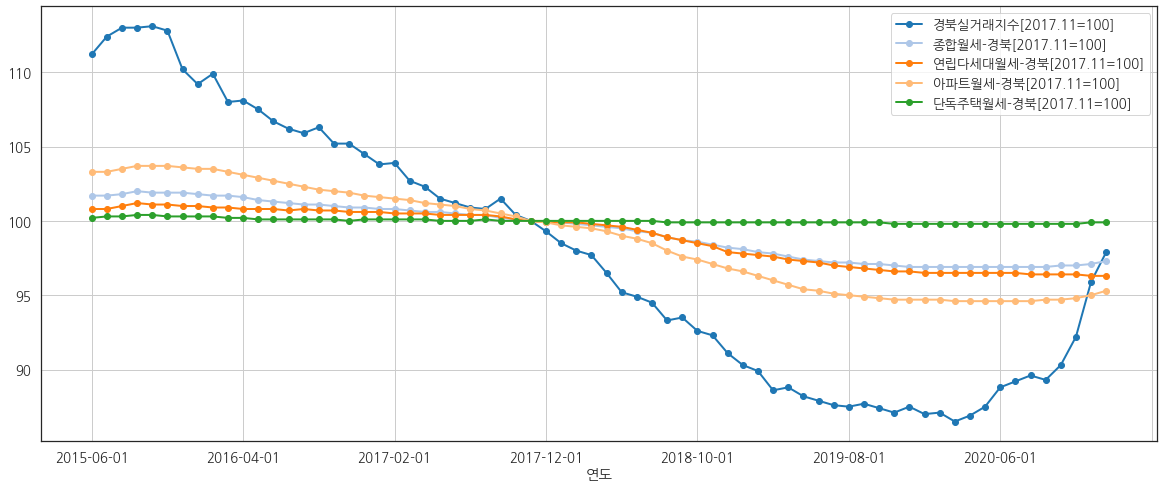

In [265]:
gru = df_100.groupby('연도').sum()

gru.plot(marker = 'o')

plt.show()

경북지역의 부동산 실 거래 가격은 상향하던 거래가가 2015-11-01부터 꾸준히 큰 폭으로 하락 했었으나 2020-03-01부터 가파른 폭으로 상향하였고, 상향 폭을 볼 때 계속 상향할 것으로 보인다.

경북지역의 아파트나 연립 다세대 주택의 월세는 부동산 거래 가격에 어느정도 영향은 받지만 그 등하락폭이 적으며 다세대 주택의 월세는 실 거래 가와 달리 소폭 하락하고 있으며 단독 주택의 월세는 15년 6월부터 계속 동결 되어 있는 것을 볼 수 있다.

이를 볼 때 경북지역은 부동산 가격은 약 6년간 크게 변동이 있었고 월세의 경우 이러한 부동산 가격에 영향을 받았으나 그 폭이 작으며, 그 중 연립 다세대 주택의 경우 부동산 거래 가가 상승하는데도 오히려 월세는 하락하는 등 부동산 가격에 영향이 미비한 것을 알 수 있다.

In [216]:
df_Housing = df_test.iloc[6:8].T
df_Housing['연도'] = df['연도']
df_Housing

,경북미분양주택[호],경북주택건설허가실적[호],연도
0,2014.0,21458.0,2015-06-01
1,1476.0,29860.0,2015-07-01
2,1891.0,33674.0,2015-08-01
3,1709.0,38058.0,2015-09-01
4,1837.0,42970.0,2015-10-01
...,...,...,...
63,3325.0,6904.0,2020-09-01
64,2922.0,7400.0,2020-10-01
65,2541.0,7945.0,2020-11-01
66,2154.0,12230.0,2020-12-01


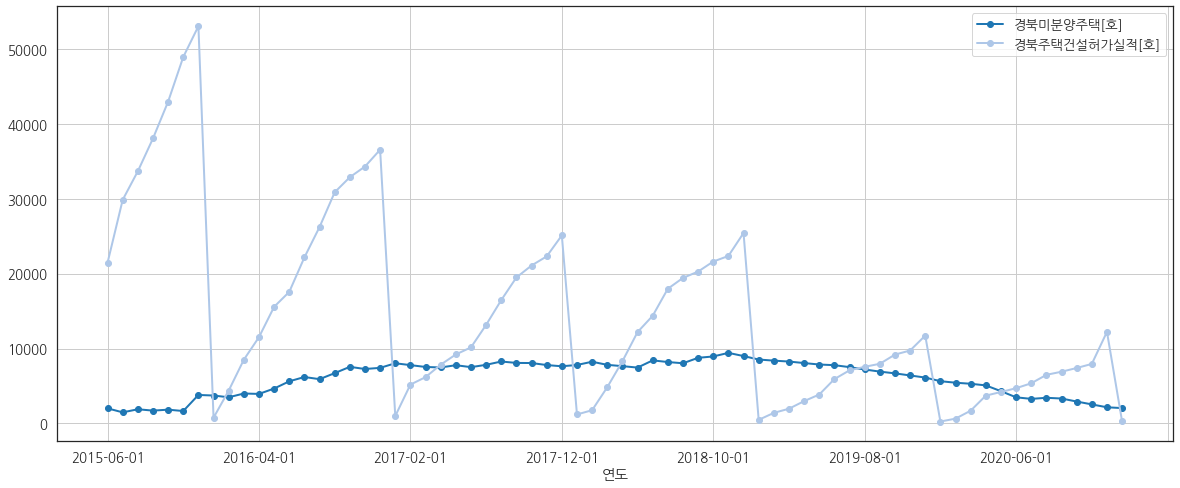

In [231]:
gru2 = df_Housing.groupby('연도').sum()



gru2.plot(marker = 'o')

주택 건설의 허가 실적은 실적이므로 년 말에 최대치를 달성하고 해가 넘어가면 초기화하여 0부터 쌓기 시작하는데, 이 12월달의 실적을 보면 매 해 조금씩 감소하는 것을 볼 수 있다.

미분양주택은 조금씩 증가하다가 2018-02-01을 기점으로 하락하기 시작하는 것을 볼 수 있다. 

이를 볼 때, 경북지역의 주택은 15년부터 16년까지 주택이 많이 건설되다가 17년 18년 그 실적이 비슷해지자 미분양주택이 감소하는 것을 볼 때, 15년, 16년에는 주택의 많은 건설에 미분양 주택이 완만하게 증가했지만 건설 실적이 적어지고 기존의 주택이 분양되면서 미분양주택의 수가 비교적 가파르게 줄어드는 것을 볼 수 있다.